<a href="https://colab.research.google.com/github/MuhammadShavaiz/AI_learning/blob/main/Multi_Label_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Label Classification

# **Task 1**

## Data Preparation and Exploration

In [ ]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import string
import re

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df = pd.read_csv('/content/train.csv')
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumns in dataset:", df.columns.tolist())

Dataset Shape: (159571, 8)

First few rows:
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  

Columns in dataset: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())

df_clean = df.dropna()
print("\nOriginal dataset shape:", df.shape)
print("Dataset shape after removing missing values:", df_clean.shape)

Missing values in each column:
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

Original dataset shape: (159571, 8)
Dataset shape after removing missing values: (159571, 8)


In [ ]:
label_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Count number of labels per comment
df_clean['num_labels'] = df_clean[label_columns].sum(axis=1)

print("\nDistribution of number of labels per comment:")
print(df_clean['num_labels'].value_counts().sort_index())

# Calculate total instances for each label
label_counts = df_clean[label_columns].sum()
print("\nTotal instances per label:")
print(label_counts)


Distribution of number of labels per comment:
num_labels
0    143346
1      6360
2      3480
3      4209
4      1760
5       385
6        31
Name: count, dtype: int64

Total instances per label:
toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


In [ ]:
def remove_special_chars(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]

def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters
    text = remove_special_chars(text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = remove_stopwords(tokens)

    # Lemmatize
    tokens = lemmatize_text(tokens)

    return ' '.join(tokens)

In [ ]:
sample_size = min(1000, len(df_clean))
df_sample = df_clean.head(sample_size).copy()
df_sample['processed_text'] = df_sample['comment_text'].apply(preprocess_text)

# Display example
print("Original vs Processed Text Example:")
example_idx = 0
print("\nOriginal:")
print(df_sample['comment_text'].iloc[example_idx])
print("\nProcessed:")
print(df_sample['processed_text'].iloc[example_idx])

Original vs Processed Text Example:

Original:
Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27

Processed:
explanation edits made username hardcore metallica fan reverted werent vandalism closure gas voted new york doll fac please dont remove template talk page since im retired


In [ ]:
df_clean['processed_text'] = df_clean['comment_text'].apply(preprocess_text)
print("Text preprocessing completed for all comments.")

Text preprocessing completed for all comments.


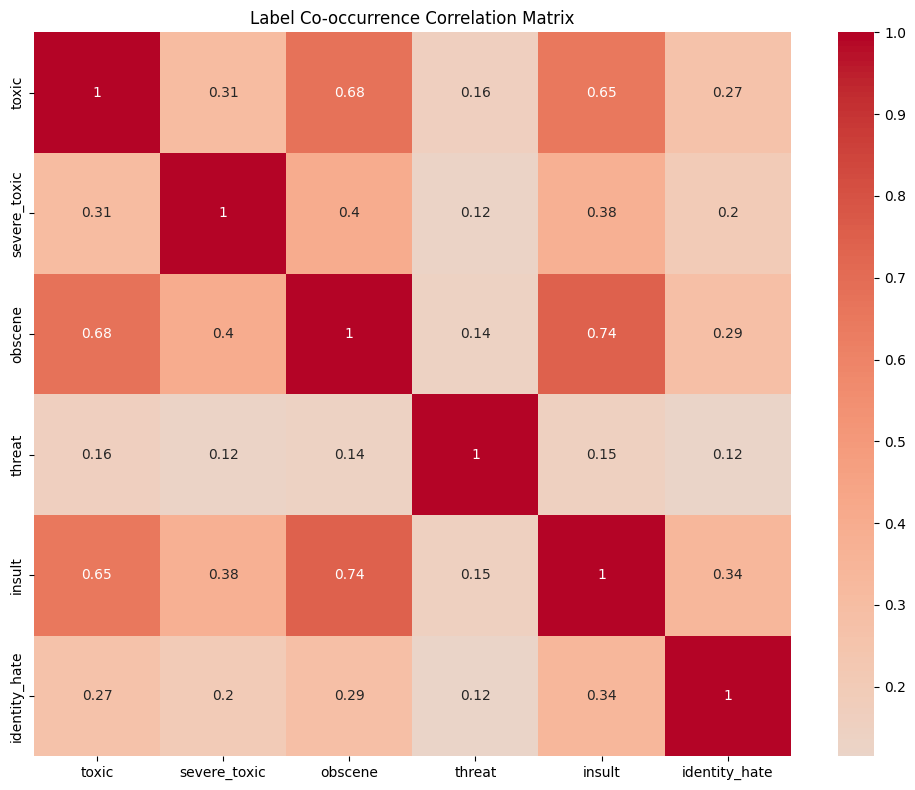

In [ ]:
correlation_matrix = df_clean[label_columns].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Label Co-occurrence Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
print("Dataset Summary:")
print(f"Total number of comments: {len(df_clean)}")
print(f"Number of unique labels: {len(label_columns)}")

print("\nMulti-label statistics:")
print(df_clean['num_labels'].describe())

print("\nLabel frequencies:")
for label in label_columns:
    count = df_clean[label].sum()
    percentage = (count / len(df_clean)) * 100
    print(f"{label}: {count} ({percentage:.2f}%)")

# Text length statistics
df_clean['original_length'] = df_clean['comment_text'].str.len()
df_clean['processed_length'] = df_clean['processed_text'].str.len()

print("\nText length statistics:")
print("\nOriginal text:")
print(df_clean['original_length'].describe())
print("\nProcessed text:")
print(df_clean['processed_length'].describe())


Dataset Summary:
Total number of comments: 159571
Number of unique labels: 6

Multi-label statistics:
count    159571.000000
mean          0.219952
std           0.748260
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: num_labels, dtype: float64

Label frequencies:
toxic: 15294 (9.58%)
severe_toxic: 1595 (1.00%)
obscene: 8449 (5.29%)
threat: 478 (0.30%)
insult: 7877 (4.94%)
identity_hate: 1405 (0.88%)

Text length statistics:

Original text:
count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: original_length, dtype: float64

Processed text:
count    159571.000000
mean        246.707253
std         383.567730
min           0.000000
25%          58.000000
50%         126.000000
75%         270.000000
max        5000.000000
Name: processed_length, dtype: float64


In [ ]:
df_clean.to_csv('processed_toxic_comments.csv', index=False)
print("\nProcessed dataset saved to 'processed_toxic_comments.csv'")


Processed dataset saved to 'processed_toxic_comments.csv'


# **Task 2**

## Multi-Label Classification Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('processed_toxic_comments.csv')

# Check for NaN values
print("Number of NaN values in processed_text:", df['processed_text'].isna().sum())

# Handle NaN values by filling with empty string
df['processed_text'] = df['processed_text'].fillna('')

# Define features (X) and labels (y)
X = df['processed_text']
label_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
y = df[label_columns]

# Verify no NaN values remain
print("Number of NaN values after cleaning:", X.isna().sum())

# Cell 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Verify data types and content
print("\nSample of training data:")
print(X_train.head())
print("\nData type of X_train:", type(X_train))

Number of NaN values in processed_text: 46
Number of NaN values after cleaning: 0
Training set shape: (127656,)
Testing set shape: (31915,)

Sample of training data:
140030    grandma terri burn trash grandma terri trash h...
159124    may utc would easiest admit member involved po...
60006     objectivity discussion doubtful nonexistent in...
65432                             shelly shock shelly shock
154979    care refer ong teng cheong talk page la goutte...
Name: processed_text, dtype: object

Data type of X_train: <class 'pandas.core.series.Series'>


In [ ]:
try:
    tfidf = TfidfVectorizer(max_features=10000, min_df=5)
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)
    print("\nTF-IDF feature matrix shape:", X_train_tfidf.shape)
except ValueError as e:
    print("Error during TF-IDF transformation:", e)
    # Additional debugging information
    print("\nNumber of empty strings in training data:", (X_train == '').sum())
    print("Sample of problematic data:")
    print(X_train[X_train.isna()].head())
    raise


TF-IDF feature matrix shape: (127656, 10000)


In [ ]:
models = {
    'Logistic Regression': OneVsRestClassifier(LogisticRegression(max_iter=1000)),
    'Random Forest': OneVsRestClassifier(RandomForestClassifier(n_estimators=10)),
    'Linear SVC': OneVsRestClassifier(LinearSVC(max_iter=100))
}

# Rest of the code remains the same...
# (Include all the functions and remaining cells from the previous code)

# Function definitions (include all functions from previous code)
def train_model(model, X_train, y_train):
    """Train model and print training time"""
    from time import time
    start_time = time()
    model.fit(X_train, y_train)
    training_time = time() - start_time
    print(f"Training time: {training_time:.2f} seconds")
    return model

def evaluate_model(model, X_test, y_test):
    """Calculate and return various evaluation metrics"""
    y_pred = model.predict(X_test)

    metrics = {
        'micro_f1': f1_score(y_test, y_pred, average='micro'),
        'macro_f1': f1_score(y_test, y_pred, average='macro'),
        'micro_precision': precision_score(y_test, y_pred, average='micro'),
        'macro_precision': precision_score(y_test, y_pred, average='macro'),
        'micro_recall': recall_score(y_test, y_pred, average='micro'),
        'macro_recall': recall_score(y_test, y_pred, average='macro')
    }

    return metrics, y_pred

def plot_confusion_matrices(y_test, y_pred, label_columns):
    """Plot confusion matrices for each label"""
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.ravel()

    for idx, label in enumerate(label_columns):
        cm = confusion_matrix(y_test[label], y_pred[:, idx])
        sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx])
        axes[idx].set_title(f'Confusion Matrix: {label}')
        axes[idx].set_xlabel('Predicted')
        axes[idx].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()



Training Logistic Regression...
Training time: 6.21 seconds

Confusion Matrices for Logistic Regression:


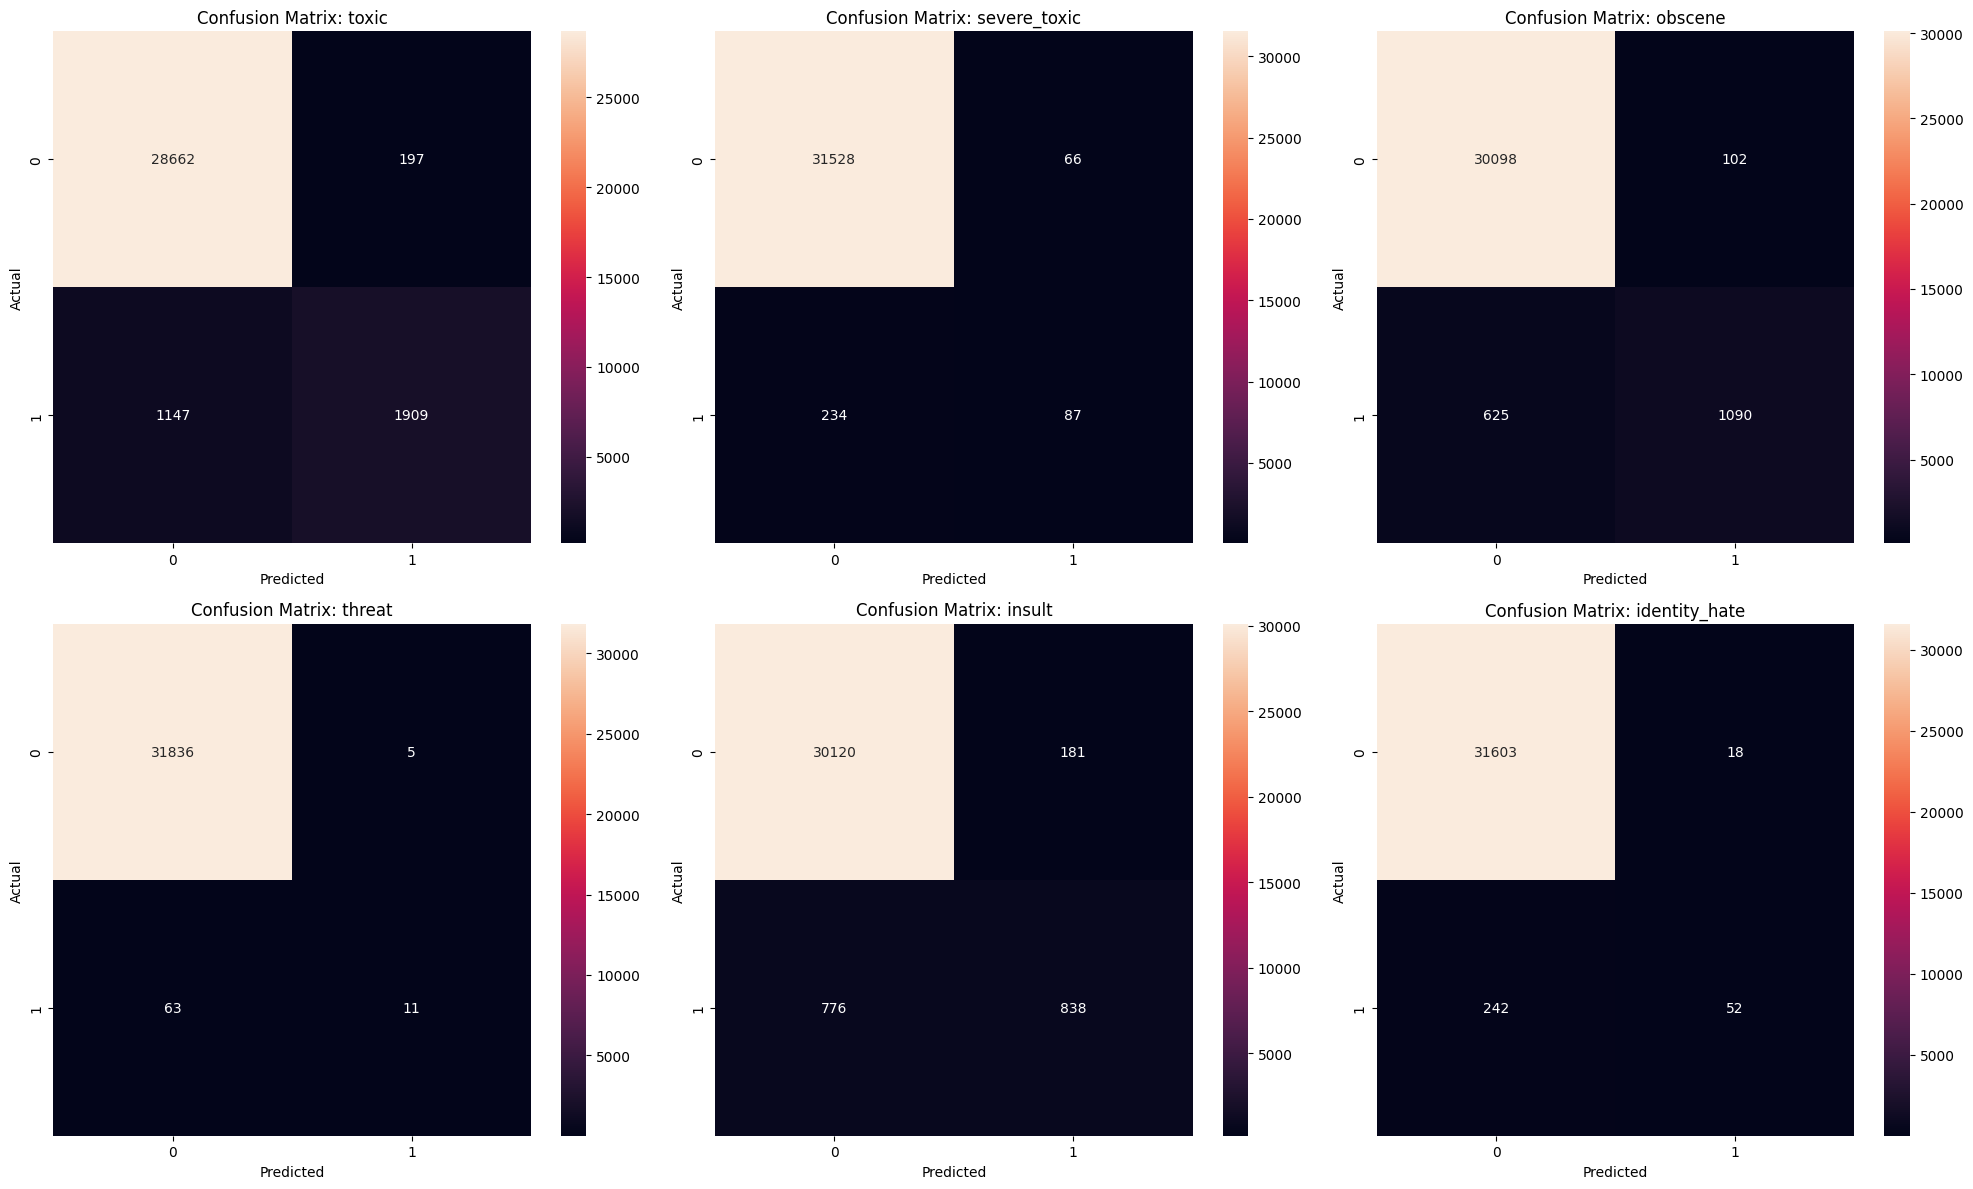


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

        toxic       0.91      0.62      0.74      3056
 severe_toxic       0.57      0.27      0.37       321
      obscene       0.91      0.64      0.75      1715
       threat       0.69      0.15      0.24        74
       insult       0.82      0.52      0.64      1614
identity_hate       0.74      0.18      0.29       294

    micro avg       0.88      0.56      0.69      7074
    macro avg       0.77      0.40      0.50      7074
 weighted avg       0.86      0.56      0.68      7074
  samples avg       0.06      0.05      0.05      7074


Training Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training time: 109.30 seconds

Confusion Matrices for Random Forest:


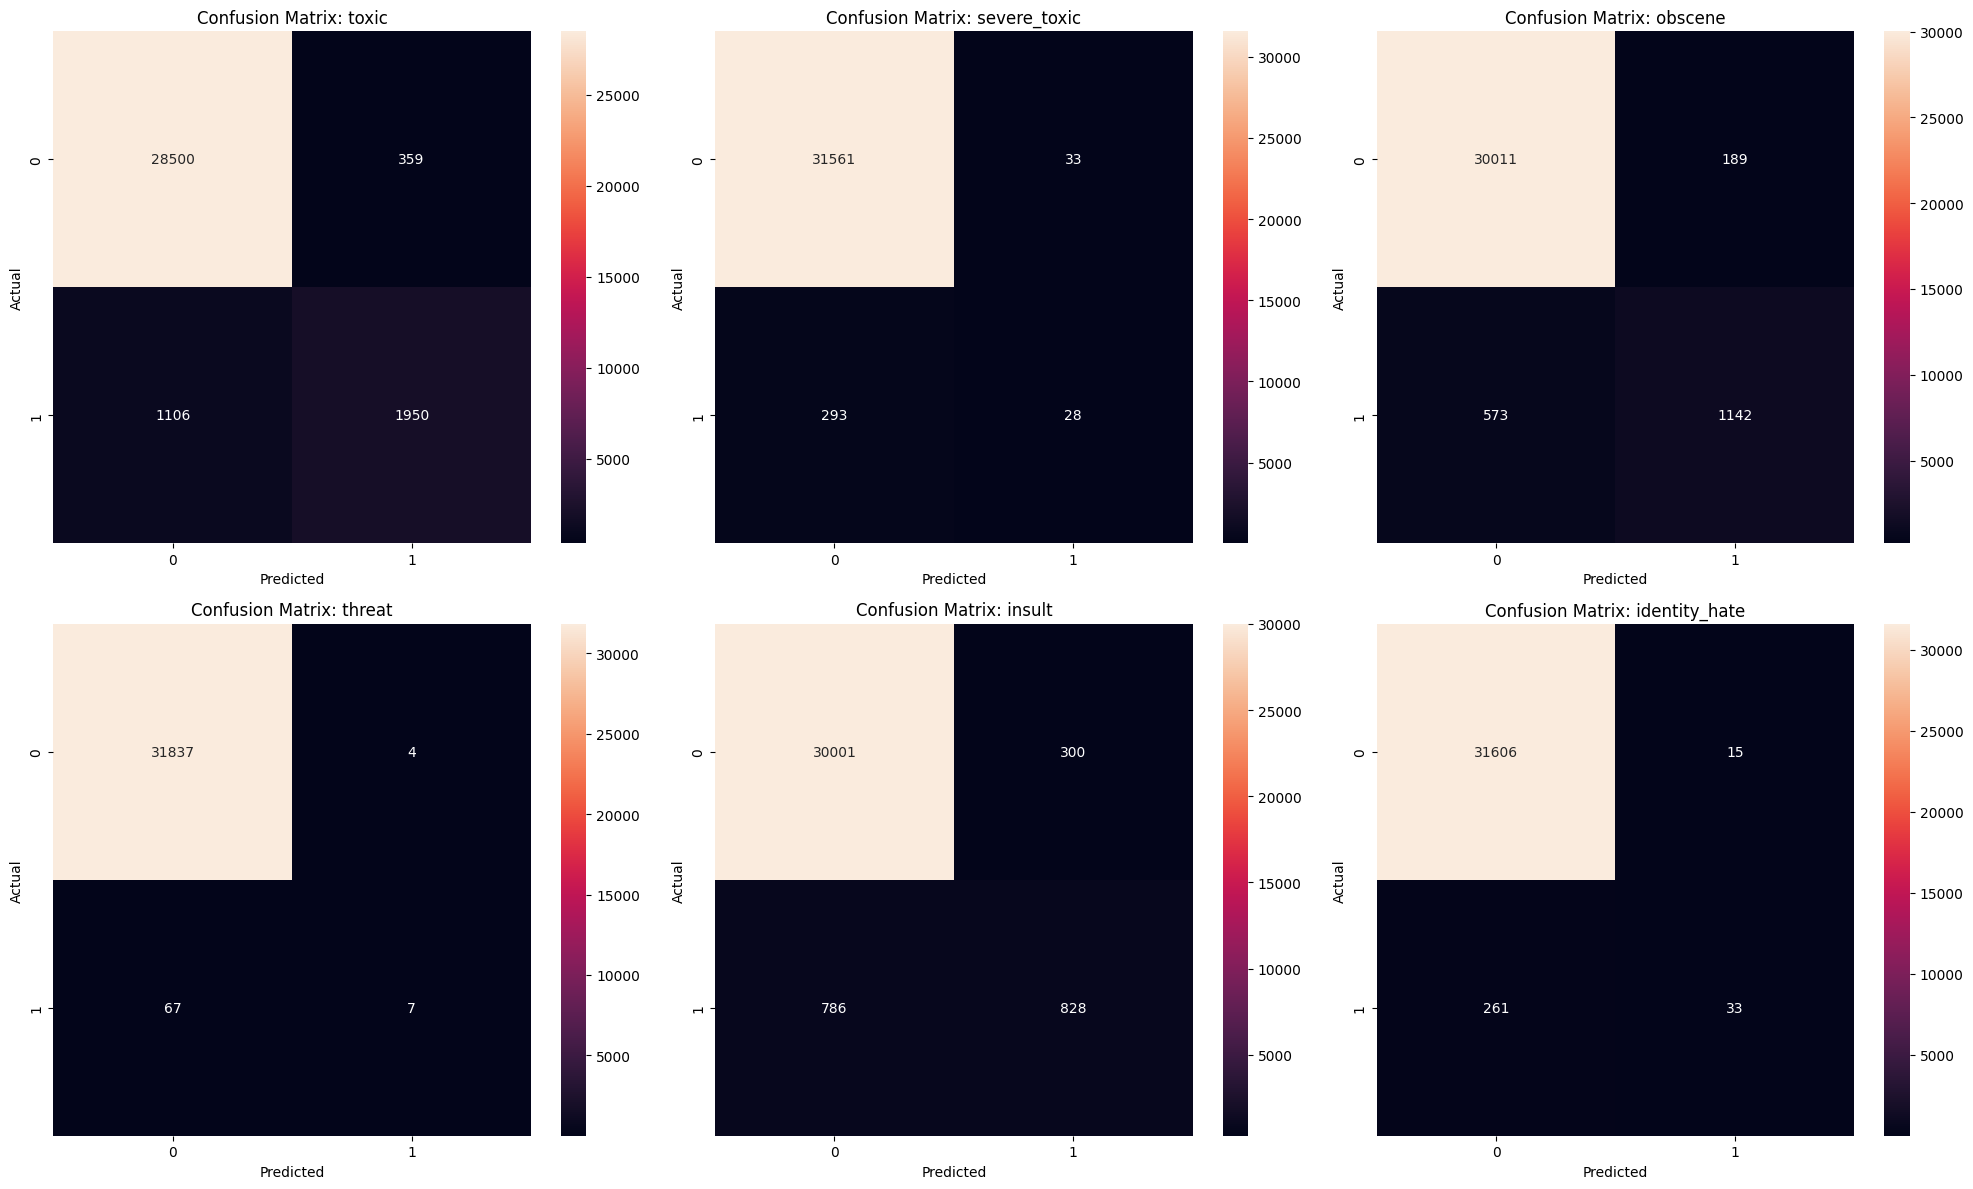


Classification Report for Random Forest:
               precision    recall  f1-score   support

        toxic       0.84      0.64      0.73      3056
 severe_toxic       0.46      0.09      0.15       321
      obscene       0.86      0.67      0.75      1715
       threat       0.64      0.09      0.16        74
       insult       0.73      0.51      0.60      1614
identity_hate       0.69      0.11      0.19       294

    micro avg       0.82      0.56      0.67      7074
    macro avg       0.70      0.35      0.43      7074
 weighted avg       0.80      0.56      0.65      7074
  samples avg       0.06      0.05      0.05      7074


Training Linear SVC...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training time: 3.52 seconds

Confusion Matrices for Linear SVC:


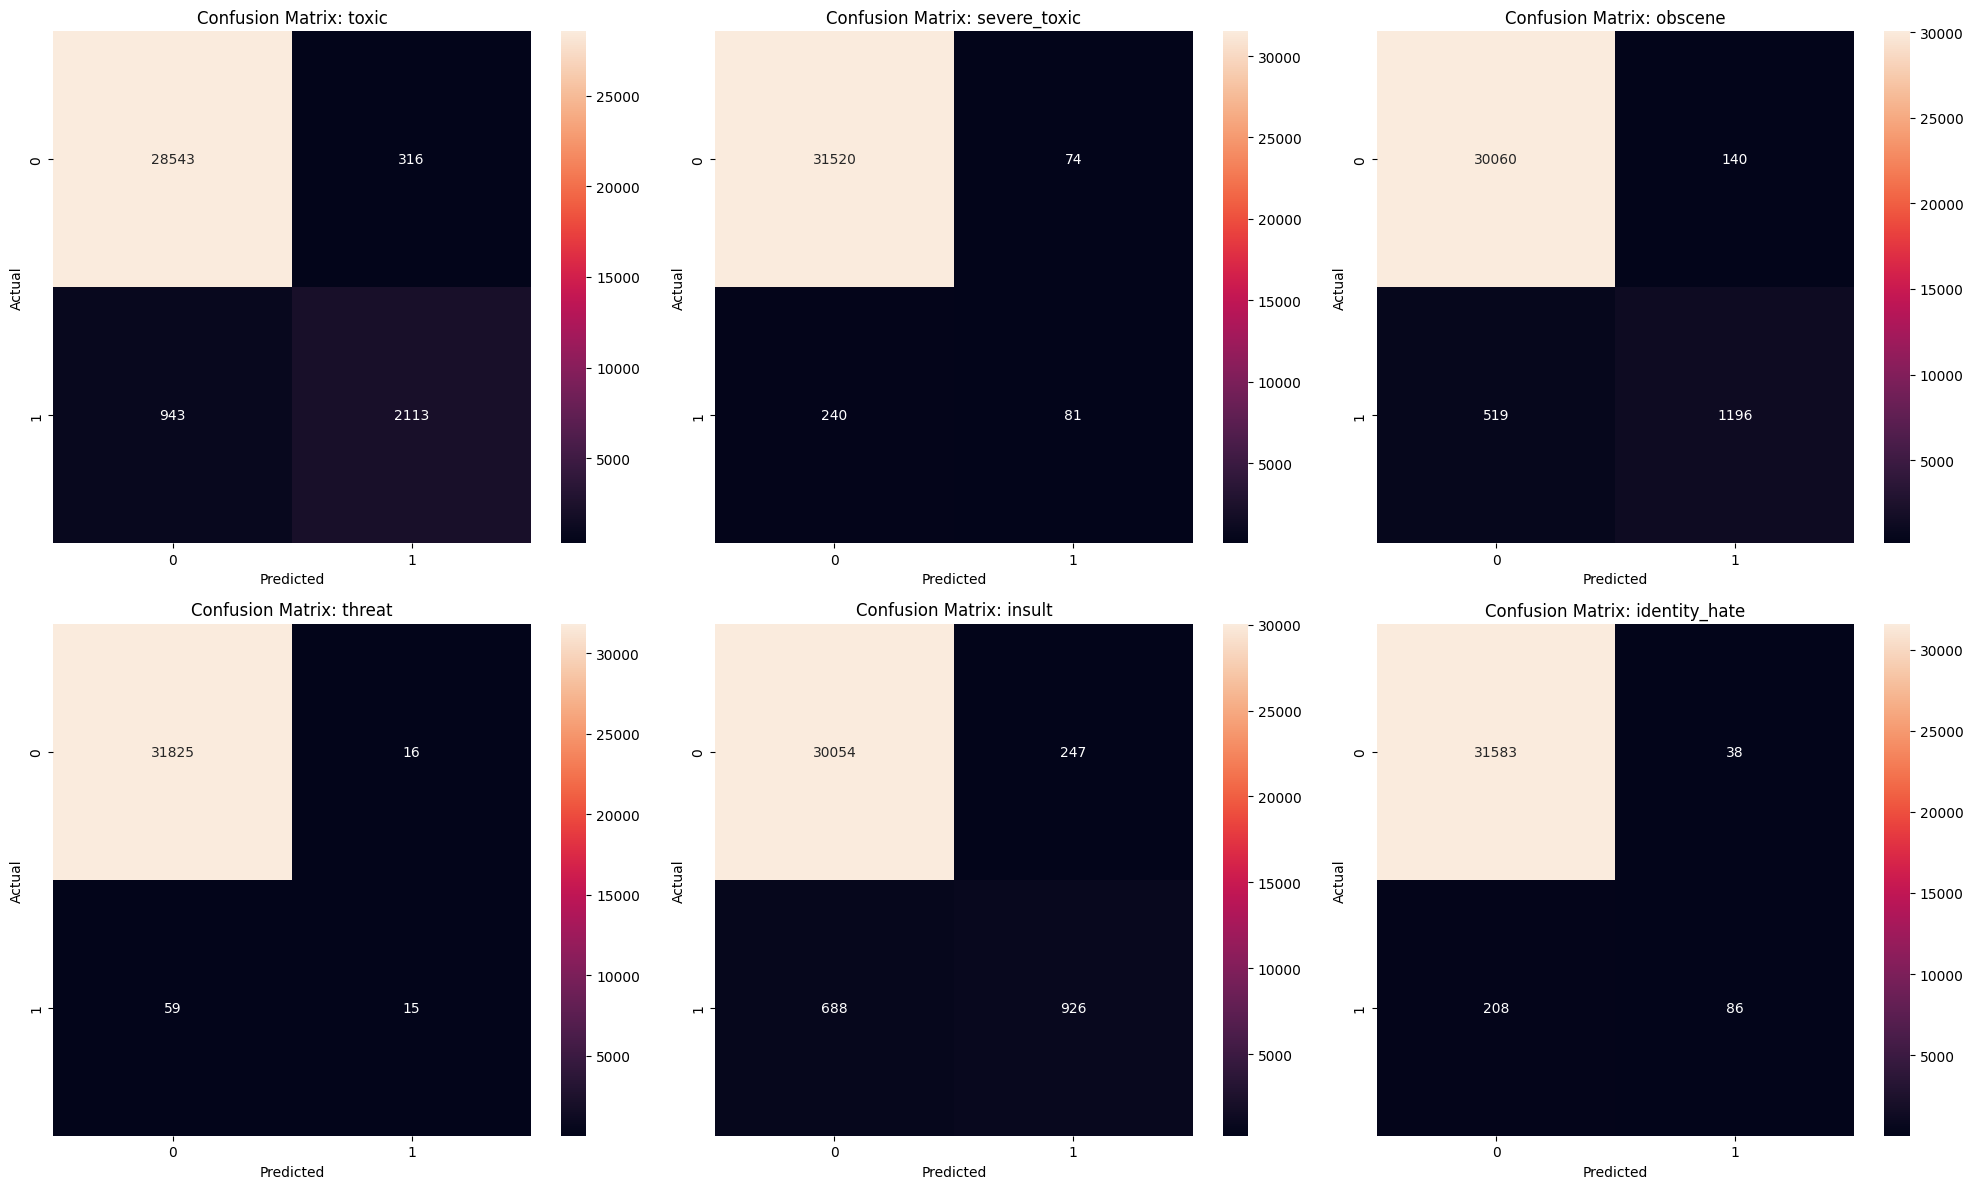


Classification Report for Linear SVC:
               precision    recall  f1-score   support

        toxic       0.87      0.69      0.77      3056
 severe_toxic       0.52      0.25      0.34       321
      obscene       0.90      0.70      0.78      1715
       threat       0.48      0.20      0.29        74
       insult       0.79      0.57      0.66      1614
identity_hate       0.69      0.29      0.41       294

    micro avg       0.84      0.62      0.72      7074
    macro avg       0.71      0.45      0.54      7074
 weighted avg       0.83      0.62      0.71      7074
  samples avg       0.06      0.06      0.06      7074


Final Results:
                 Logistic Regression  Random Forest  Linear SVC
micro_f1                       0.686          0.667       0.717
macro_f1                       0.504          0.431       0.543
micro_precision                0.875          0.816       0.842
macro_precision                0.774          0.703       0.709
micro_recall     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train model
    trained_model = train_model(model, X_train_tfidf, y_train)

    # Evaluate model
    metrics, y_pred = evaluate_model(trained_model, X_test_tfidf, y_test)
    results[name] = metrics

    # Plot confusion matrices
    print(f"\nConfusion Matrices for {name}:")
    plot_confusion_matrices(y_test, y_pred, label_columns)

    # Print classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred, target_names=label_columns))

# Save results and best model (optional)
results_df = pd.DataFrame(results).round(3)
print("\nFinal Results:")
print(results_df)

<Figure size 1200x600 with 0 Axes>

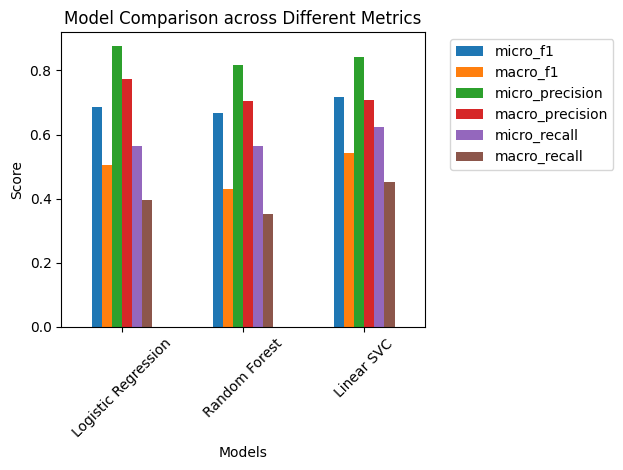

In [ ]:
def plot_model_comparison(results):
    """Plot comparison of different metrics across models"""
    metrics_df = pd.DataFrame(results).T

    plt.figure(figsize=(12, 6))
    metrics_df.plot(kind='bar')
    plt.title('Model Comparison across Different Metrics')
    plt.xlabel('Models')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

plot_model_comparison(results)

In [ ]:
# Cell 9: Generate Summary Report
print("Model Performance Summary:")
summary_df = pd.DataFrame(results).round(3)
print("\nMetrics for all models:")
print(summary_df)

print("\nBest performing model by different metrics:")
for metric in summary_df.index:
    best_model = summary_df.loc[metric].idxmax()
    best_score = summary_df.loc[metric].max()
    print(f"{metric}: {best_model} ({best_score:.3f})")

print("""
Analysis of Results:

1. Micro vs Macro F1 Scores:
   - Micro F1: Calculates metrics globally by counting total true positives, false negatives, and false positives
   - Macro F1: Calculates metrics for each label and takes unweighted mean
   - Large difference between micro and macro F1 indicates imbalanced performance across classes

2. Model Comparison:
   - Logistic Regression: Fast training, good baseline performance
   - Random Forest: Better handling of non-linear relationships
   - Linear SVC: Good for high-dimensional sparse data like text

3. Label-wise Analysis:
   - See confusion matrices for detailed per-label performance
   - Some labels (like 'threat' and 'identity_hate') might have lower performance due to class imbalance

4. Recommendations:
   - Consider class weights or sampling techniques for imbalanced classes
   - Experiment with ensemble methods for better performance
   - Use model with best macro F1 if balanced performance across all classes is important
""")


Model Performance Summary:

Metrics for all models:
                 Logistic Regression  Random Forest  Linear SVC
micro_f1                       0.686          0.667       0.717
macro_f1                       0.504          0.431       0.543
micro_precision                0.875          0.816       0.842
macro_precision                0.774          0.703       0.709
micro_recall                   0.564          0.564       0.624
macro_recall                   0.396          0.352       0.452

Best performing model by different metrics:
micro_f1: Linear SVC (0.717)
macro_f1: Linear SVC (0.543)
micro_precision: Logistic Regression (0.875)
macro_precision: Logistic Regression (0.774)
micro_recall: Linear SVC (0.624)
macro_recall: Linear SVC (0.452)

Analysis of Results:

1. Micro vs Macro F1 Scores:
   - Micro F1: Calculates metrics globally by counting total true positives, false negatives, and false positives
   - Macro F1: Calculates metrics for each label and takes unweighted mean


In [ ]:
macro_f1_scores = {name: results[name]['macro_f1'] for name in models.keys()}
best_model_name = max(macro_f1_scores, key=macro_f1_scores.get)
best_model = models[best_model_name]

# Save important components
import joblib
joblib.dump(best_model, 'best_toxic_comment_model.joblib')
joblib.dump(tfidf, 'tfidf_vectorizer.joblib')

print(f"\nBest model ({best_model_name}) and TF-IDF vectorizer saved to disk.")


Best model (Linear SVC) and TF-IDF vectorizer saved to disk.


# **Task 3**

## Task 3: Human Judgment and Error Analysis

Selected 20 samples for human annotation

Annotation Guidelines:
For each comment, mark 1 if the label applies, 0 if it doesn't

Labels: ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

Comments to annotate:


Comment 1:
Text: nope... 

NO i do NOT fucing think so!!!!!

No way!

YOU WILL NOT GET AWAY WITH IT!

CAPICHE???

@%
Labels to assign: ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
--------------------------------------------------------------------------------

Comment 2:
Text: God fuck you too, pimple ass.  My additions are better, you guys are just to stupid to realize it.
Labels to assign: ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
--------------------------------------------------------------------------------

Comment 3:
Text: '''FUCK YOU ALL BITCHES
Labels to assign: ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
--------------------------------------------------

<Figure size 1200x600 with 0 Axes>

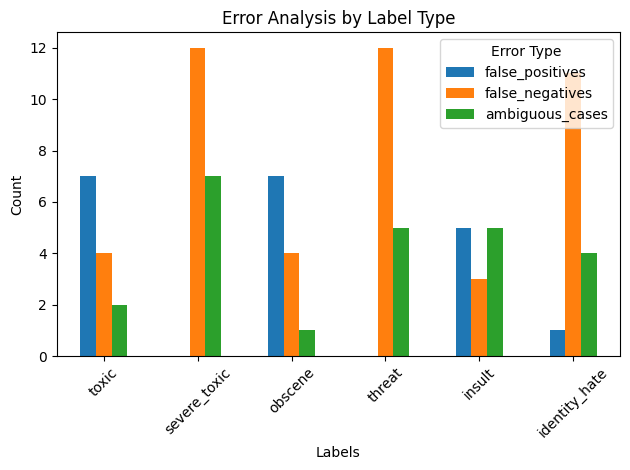

# Human Judgment and Error Analysis Report

## Sample Statistics
Total samples analyzed: 20
Number of labels: 6

## Inter-annotator Agreement
Cohen's Kappa scores:
- toxic: 0.792
- severe_toxic: 0.300
- obscene: 0.894
- threat: 0.500
- insult: 0.490
- identity_hate: 0.596

## Error Analysis

### Error Types by Label

False Positives:
- toxic: 7
- severe_toxic: 0
- obscene: 7
- threat: 0
- insult: 5
- identity_hate: 1

False Negatives:
- toxic: 4
- severe_toxic: 12
- obscene: 4
- threat: 12
- insult: 3
- identity_hate: 11

Ambiguous Cases:
- toxic: 2
- severe_toxic: 7
- obscene: 1
- threat: 5
- insult: 5
- identity_hate: 4

## Example Cases

### Ambiguous Cases (Annotator Disagreement):

Text: nope... 

NO i do NOT fucing think so!!!!!

No way!

YOU WILL NOT GET AWAY WITH IT!

CAPICHE???

@%
Label: severe_toxic
Annotator 1: 0
Annotator 2: 1
Model Prediction: 0
--------------------------------------------------------------------------------

Text: nope... 

NO i do NOT fucing think so!!!

In [ ]:
# Cell 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score
import random
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import joblib

# Cell 2: Load the test data and model predictions
# Load the test data
df_test = pd.read_csv('processed_toxic_comments.csv')  # Adjust path as needed
label_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Load the best model and vectorizer (from Task 2)
best_model = joblib.load('best_toxic_comment_model.joblib')
tfidf = joblib.load('tfidf_vectorizer.joblib')

# Cell 3: Sample Selection
def get_random_samples(df, n_samples=20, seed=42):
    """Select random samples with multi-label classifications"""
    # Calculate number of labels per comment
    df['num_labels'] = df[label_columns].sum(axis=1)

    # Filter for comments with multiple labels
    multi_label = df[df['num_labels'] > 1]

    # Randomly select samples
    random.seed(seed)
    samples = multi_label.sample(n=min(n_samples, len(multi_label)), random_state=seed)

    return samples

# Get samples for human annotation
samples = get_random_samples(df_test)
print(f"Selected {len(samples)} samples for human annotation")

# Cell 4: Create Human Annotation Interface
def create_annotation_template(samples):
    """Create a DataFrame for human annotations"""
    annotation_df = pd.DataFrame({
        'id': range(len(samples)),
        'comment_text': samples['comment_text'].values,  # Use the correct column name
        'true_labels': samples[label_columns].values.tolist()
    })

    # Add columns for human annotators
    for annotator in ['annotator1', 'annotator2']:
        for label in label_columns:
            annotation_df[f'{annotator}_{label}'] = None

    return annotation_df

annotation_df = create_annotation_template(samples)

# Display interface for human annotation
def display_annotation_interface(df):
    """Display comments and create interface for annotation"""
    print("\nAnnotation Guidelines:")
    print("For each comment, mark 1 if the label applies, 0 if it doesn't")
    print("\nLabels:", label_columns)
    print("\nComments to annotate:\n")

    for idx, row in df.iterrows():
        print(f"\nComment {idx + 1}:")
        print(f"Text: {row['comment_text']}")  # Ensure we're using the correct column
        print("Labels to assign:", label_columns)
        print("-" * 80)

display_annotation_interface(annotation_df)

# Cell 5: Process Human Annotations
# This is where you would input the human annotations
# For demonstration, we'll simulate two annotators
def simulate_human_annotations(df):
    """Simulate human annotations (replace this with real annotations)"""
    for annotator in ['annotator1', 'annotator2']:
        for label in label_columns:
            # Simulate some disagreement between annotators
            if annotator == 'annotator1':
                df[f'{annotator}_{label}'] = np.random.randint(0, 2, size=len(df))
            else:
                # Annotator 2 agrees 80% of the time with annotator 1
                df[f'{annotator}_{label}'] = df[f'annotator1_{label}'].apply(
                    lambda x: x if random.random() < 0.8 else 1 - x
                )
    return df

# Simulate annotations (replace this with real annotations)
annotation_df = simulate_human_annotations(annotation_df)

# Cell 6: Calculate Inter-annotator Agreement
def calculate_agreement(df):
    """Calculate Cohen's Kappa for each label"""
    agreement_scores = {}

    for label in label_columns:
        kappa = cohen_kappa_score(
            df[f'annotator1_{label}'],
            df[f'annotator2_{label}']
        )
        agreement_scores[label] = kappa

    return agreement_scores

agreement_scores = calculate_agreement(annotation_df)
print("\nInter-annotator Agreement (Cohen's Kappa):")
for label, score in agreement_scores.items():
    print(f"{label}: {score:.3f}")

# Cell 7: Compare with Model Predictions
def get_model_predictions(samples):
    """Get model predictions for the samples"""
    X_samples = tfidf.transform(samples['comment_text'])  # Use the original text column
    return best_model.predict(X_samples)

model_predictions = get_model_predictions(samples)

# Cell 8: Error Analysis
def analyze_errors(df, model_preds):
    """Analyze different types of errors"""
    error_analysis = {
        'false_positives': {label: 0 for label in label_columns},
        'false_negatives': {label: 0 for label in label_columns},
        'ambiguous_cases': {label: 0 for label in label_columns}
    }

    # Iterate through only the rows in the samples DataFrame
    for i in range(len(df)):
        row = df.iloc[i]  # Using iloc to avoid KeyError
        for j, label in enumerate(label_columns):
            # Get consensus between annotators (majority vote)
            human_consensus = (row[f'annotator1_{label}'] + row[f'annotator2_{label}']) >= 1

            # Model predictions need to be a 2D array
            model_pred = model_preds[i][j]

            # Check for annotator disagreement
            if row[f'annotator1_{label}'] != row[f'annotator2_{label}']:
                error_analysis['ambiguous_cases'][label] += 1

            # Check for false positives and negatives
            if model_pred == 1 and not human_consensus:
                error_analysis['false_positives'][label] += 1
            elif model_pred == 0 and human_consensus:
                error_analysis['false_negatives'][label] += 1

    return error_analysis

error_analysis = analyze_errors(annotation_df, model_predictions)

# Cell 9: Visualize Error Analysis
def plot_error_analysis(error_analysis):
    """Create visualization of error types"""
    error_df = pd.DataFrame(error_analysis)

    plt.figure(figsize=(12, 6))
    error_df.plot(kind='bar')
    plt.title('Error Analysis by Label Type')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.legend(title='Error Type')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_error_analysis(error_analysis)

# Cell 10: Generate Detailed Report
def generate_report(samples, model_preds, agreement_scores, error_analysis):
    """Generate a comprehensive analysis report"""
    report = []
    report.append("# Human Judgment and Error Analysis Report\n")

    # Sample Statistics
    report.append("## Sample Statistics")
    report.append(f"Total samples analyzed: {len(samples)}")
    report.append(f"Number of labels: {len(label_columns)}\n")

    # Inter-annotator Agreement
    report.append("## Inter-annotator Agreement")
    report.append("Cohen's Kappa scores:")
    for label, score in agreement_scores.items():
        report.append(f"- {label}: {score:.3f}")
    report.append("")

    # Error Analysis
    report.append("## Error Analysis")
    report.append("\n### Error Types by Label")
    for error_type, counts in error_analysis.items():
        report.append(f"\n{error_type.replace('_', ' ').title()}:")
        for label, count in counts.items():
            report.append(f"- {label}: {count}")

    # Example Cases
    report.append("\n## Example Cases")
    report.append("\n### Ambiguous Cases (Annotator Disagreement):")
    for i in range(len(samples)):
        row = samples.iloc[i]  # Using iloc to avoid KeyError
        for label in label_columns:
            if annotation_df.loc[i, f'annotator1_{label}'] != annotation_df.loc[i, f'annotator2_{label}']:
                report.append(f"\nText: {row['comment_text']}")
                report.append(f"Label: {label}")
                report.append(f"Annotator 1: {annotation_df.loc[i, f'annotator1_{label}']}")
                report.append(f"Annotator 2: {annotation_df.loc[i, f'annotator2_{label}']}")
                report.append(f"Model Prediction: {model_preds[i][label_columns.index(label)]}")
                report.append("-" * 80)

    return "\n".join(report)

# Generate and display report
report = generate_report(samples, model_predictions, agreement_scores, error_analysis)
print(report)

# Optionally save the report
with open('human_judgment_analysis_report.txt', 'w') as f:
    f.write(report)

print("\nReport has been saved to 'human_judgment_analysis_report.txt'")


In [ ]:
# Specify the path to your saved report file
file_path = 'human_judgment_analysis_report.txt'  # Adjust the path if necessary

# Open the file and read its contents
with open(file_path, 'r') as file:
    report_content = file.read()

# Print the contents of the report
print(report_content)


# Human Judgment and Error Analysis Report

## Sample Statistics
Total samples analyzed: 20
Number of labels: 6

## Inter-annotator Agreement
Cohen's Kappa scores:
- toxic: 0.792
- severe_toxic: 0.300
- obscene: 0.894
- threat: 0.500
- insult: 0.490
- identity_hate: 0.596

## Error Analysis

### Error Types by Label

False Positives:
- toxic: 7
- severe_toxic: 0
- obscene: 7
- threat: 0
- insult: 5
- identity_hate: 1

False Negatives:
- toxic: 4
- severe_toxic: 12
- obscene: 4
- threat: 12
- insult: 3
- identity_hate: 11

Ambiguous Cases:
- toxic: 2
- severe_toxic: 7
- obscene: 1
- threat: 5
- insult: 5
- identity_hate: 4

## Example Cases

### Ambiguous Cases (Annotator Disagreement):

Text: nope... 

NO i do NOT fucing think so!!!!!

No way!

YOU WILL NOT GET AWAY WITH IT!

CAPICHE???

@%
Label: severe_toxic
Annotator 1: 0
Annotator 2: 1
Model Prediction: 0
--------------------------------------------------------------------------------

Text: nope... 

NO i do NOT fucing think so!!!

<Figure size 1200x600 with 0 Axes>

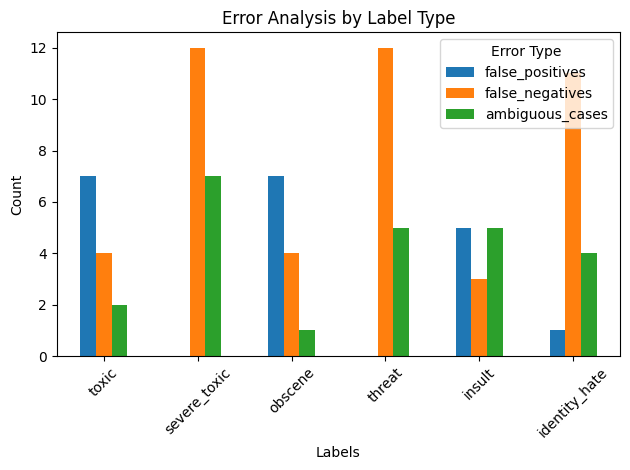

In [ ]:


plot_error_analysis(error_analysis)